# Stock price prediction using Machine Learning

In [1]:
import pip
pip.main(["install","yfinance"])

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


  Attempting uninstall: pytz
    Found existing installation: pytz 2021.1
    Uninstalling pytz-2021.1:
      Successfully uninstalled pytz-2021.1
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.1
    Uninstalling numpy-1.20.1:
      Successfully uninstalled numpy-1.20.1
  Attempting uninstall: pandas
    Found existing installation: pandas 1.2.4
    Uninstalling pandas-1.2.4:
      Successfully uninstalled pandas-1.2.4
  Attempting uninstall: lxml
    Found existing installation: lxml 4.6.3
    Uninstalling lxml-4.6.3:
      Successfully uninstalled lxml-4.6.3
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.9.3
    Uninstalling beautifulsoup4-4.9.3:
      Successfully uninstalled beautifulsoup4-4.9.3


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.
scipy 1.6.2 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.24.2 which is incompatible.


0

# Importing needful libraries

In [2]:
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

NumExpr defaulting to 8 threads.


C:\Users\Prathibha\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


# Importing data

In [3]:
df=yf.download("AAPL",start="2010-01-01",end="2019-12-31")

[*********************100%***********************]  1 of 1 completed


In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.505280,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.516527,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.412872,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.401017,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.443575,447610800


# Setting data

In [5]:
df=df["Close"].to_frame()
df.head()

,Close
Date,
2010-01-04,7.643214
2010-01-05,7.656429
2010-01-06,7.534643
2010-01-07,7.520714
2010-01-08,7.570714


# Sliding window

In [6]:
df["Close in 10 changes"]=df["Close"].shift(-10) #Here the window is 10 changes

In [72]:
df.head(20)

,Close,Close in 10 changes
Date,,
2009-12-31,7.526071,7.354643
2010-01-04,7.643214,7.680000
2010-01-05,7.656429,7.561786
2010-01-06,7.534643,7.431071
2010-01-07,7.520714,7.062500
2010-01-08,7.570714,7.252500
2010-01-11,7.503929,7.355000
2010-01-12,7.418571,7.424286
2010-01-13,7.523214,7.117500


In [7]:
dfc=df.iloc[:-10,:]

In [8]:
df.reset_index(inplace=True)

In [9]:
df.head()

,Date,Close,Close in 10 changes
0,2010-01-04,7.643214,7.680000
1,2010-01-05,7.656429,7.561786
2,2010-01-06,7.534643,7.431071
3,2010-01-07,7.520714,7.062500
4,2010-01-08,7.570714,7.252500


# Machine Learning

In [10]:
x=dfc.iloc[:,0].values.reshape(dfc.shape[0],1)
y=dfc.iloc[:,1].values

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [12]:
rf = RandomForestRegressor(n_estimators=500)
rf.fit(x_train, y_train)
y_pred=rf.predict(x_test)
np.sqrt(mean_squared_error(y_test,y_pred))

1.7950722719318661

# Forcasting

In [13]:
y_act_10=dfc.iloc[-10:,:]["Close in 10 changes"].values
y_act_10

array([69.96499634, 70.10250092, 69.93499756, 70.00499725, 69.86000061,
       71.        , 71.06749725, 72.47750092, 72.44999695, 72.87999725])

In [14]:
y_pred_10=rf.predict(dfc.iloc[-10:,:]["Close"].values.reshape(10,1))

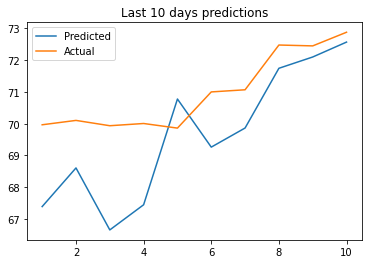

In [15]:
plt.plot(range(1,11),y_pred_10)
plt.plot(range(1,11),y_act_10)
plt.legend(["Predicted","Actual"])
plt.title("Last 10 days predictions")
plt.show()